In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
# Membuat dataset dari tabel yang diberikan
data = {
    'Outlook': ['Sunny', 'Sunny', 'Cloudy', 'Rainy', 'Rainy', 'Rainy', 'Cloudy', 'Sunny', 'Sunny', 
                'Rainy', 'Sunny', 'Cloudy', 'Cloudy', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 
                    'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 
                 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Play': ["Don't Play", "Don't Play", "Play", "Play", "Play", "Play", "Play", "Don't Play", "Play", 
             "Play", "Play", "Play", "Play", "Don't Play"]
}

In [4]:
# Mengonversi data ke dalam DataFrame
df = pd.DataFrame(data)

In [5]:
# Fungsi untuk menghitung entropy
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = -sum((counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(elements)))
    return entropy_val

In [6]:
# Menghitung entropy dari keseluruhan data (entropi dari target 'Play')
entropy_total = entropy(df['Play'])
print("Entropy total:", entropy_total)

Entropy total: 0.863120568566631


In [7]:
# Fungsi untuk menghitung information gain
def info_gain(data, split_attribute_name, target_name="Play"):
    # Menghitung entropy data sebelum dibagi
    total_entropy = entropy(data[target_name])

    # Mendapatkan nilai unik dan menghitung entropi tertimbang masing-masing subset
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    weighted_entropy = sum((counts[i] / np.sum(counts)) * entropy(data[data[split_attribute_name] == vals[i]][target_name])
                           for i in range(len(vals)))

    # Menghitung gain
    information_gain = total_entropy - weighted_entropy
    return information_gain

In [8]:
# Menghitung gain untuk setiap atribut
print("Gain untuk Outlook:", info_gain(df, 'Outlook'))
print("Gain untuk Temperature:", info_gain(df, 'Temperature'))
print("Gain untuk Humidity:", info_gain(df, 'Humidity'))
print("Gain untuk Windy:", info_gain(df, 'Windy'))

Gain untuk Outlook: 0.2585210366587628
Gain untuk Temperature: 0.18385092540042125
Gain untuk Humidity: 0.37050650054950524
Gain untuk Windy: 0.0059777114237739015


In [9]:
# Mengonversi data kategori menjadi data numerik
df_encoded = df.copy()
df_encoded['Outlook'] = df_encoded['Outlook'].map({'Sunny': 0, 'Cloudy': 1, 'Rainy': 2})
df_encoded['Temperature'] = df_encoded['Temperature'].map({'Hot': 0, 'Mild': 1, 'Cool': 2})
df_encoded['Humidity'] = df_encoded['Humidity'].map({'High': 0, 'Normal': 1})
df_encoded['Windy'] = df_encoded['Windy'].map({'No': 0, 'Yes': 1})
df_encoded['Play'] = df_encoded['Play'].map({"Don't Play": 0, 'Play': 1})

In [10]:
# Memisahkan fitur dan target
X = df_encoded[['Outlook', 'Temperature', 'Humidity', 'Windy']]
y = df_encoded['Play']

In [11]:
# Melatih model pohon keputusan
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

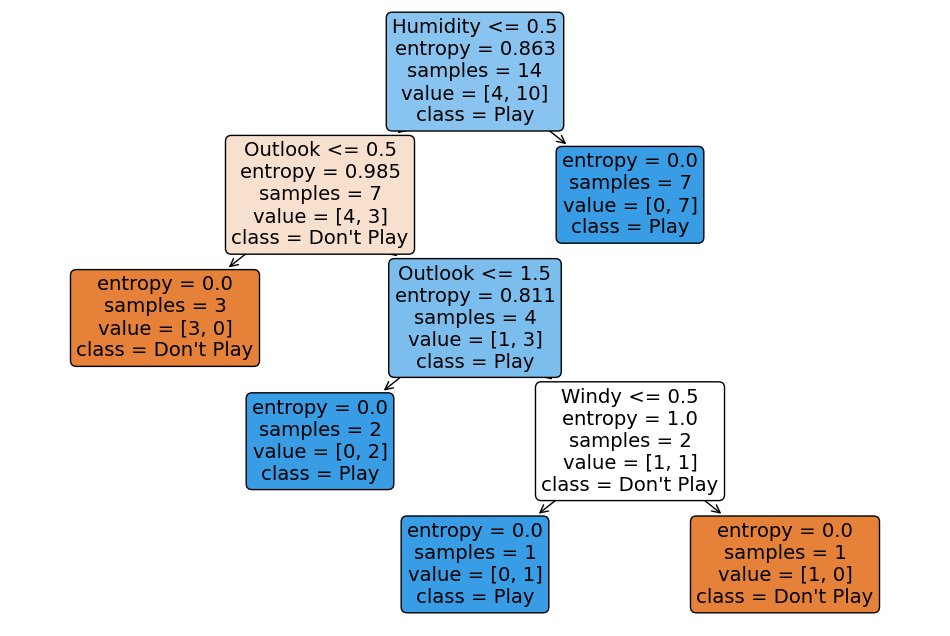

In [12]:
# Visualisasi pohon keputusan
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=['Outlook', 'Temperature', 'Humidity', 'Windy'], 
               class_names=["Don't Play", "Play"], filled=True, rounded=True)
plt.show()